In [10]:
import pandas as pd
import numpy as np

cast_df = pd.read_csv(r'./cast.csv')

In [144]:
cast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333695 entries, 0 to 3333694
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 152.6+ MB


In [277]:
cast_df.head(10)

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN
5,Townbiz,2010,Too $hort,actor,Himself,NaN
6,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
7,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN
8,When the Man Went South,2014,Taipaleti 'Atu'ake,actor,Two Palms - Ua'i Paame,8.0
9,Little Angel (Angelita),2015,Michael 'babeepower' Viera,actor,Chico,9.0


# Question 1

In [123]:
title_has_hamlet = cast_df.loc[cast_df["title"].str.contains("Hamlet")]

title_has_hamlet["title"].unique()


array(['Hamlet', 'Hamlet, Prince of Denmark', 'Hamlet 2',
       'Hamlet: Prince of Denmark', 'National Theatre Live: Hamlet',
       'Hamlet (II)', 'Hamlet A.D.D.', 'Hamlet_X', 'Zombie Hamlet',
       'Han, hun og Hamlet', 'Hamlet (III)', 'Hamlet liikemaailmassa',
       "Hamlet's Ghost", 'Hamlet the Vampire Slayer',
       "Dogg's Hamlet, Cahoot's Macbeth", 'Hamlet in the Hamptons',
       'Hamlet, Son of a Kingpin', 'Harry, Hamlet and I',
       'Kitchen Hamlet', 'Green Eggs and Hamlet', 'A Sagebrush Hamlet',
       "Predstava 'Hamleta' u Mrdusi Donjoj",
       'The Tragedy of Hamlet Prince of Denmark', 'Hamlet Unbound',
       'Fuck Hamlet', 'Kadin Hamlet', 'Hamlet X'], dtype=object)

# Question 2

In [124]:
treasure_island_movies = cast_df.loc[cast_df["title"].str.contains("Treasure Island")]


treasure_island_movies_grouped = treasure_island_movies.groupby("title")

treasure_island_movies.groupby(['year','title']).sum().reset_index()[["year","title"]]

,year,title
0,1918,Treasure Island
1,1920,Treasure Island
2,1934,Treasure Island
3,1938,The Secret of Treasure Island
4,1939,Charlie Chan at Treasure Island
5,1950,Treasure Island
6,1954,Return to Treasure Island
7,1957,Five on a Treasure Island
8,1972,Treasure Island
9,1973,Treasure Island


# Question 3

In [152]:
filtered_hamlet = cast_df.loc[(cast_df["title"].str.contains("Hamlet")) & (cast_df["year"] == 1921)]

len(filtered_hamlet["character"].unique())

9

In [151]:
len(cast_df.query('year ==1921 & title.str.contains("Hamlet").values')["character"].unique())

9

# Question 4

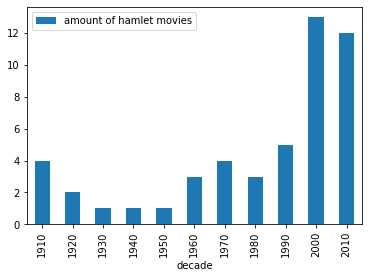

In [356]:

hamlet_movies = title_has_hamlet.copy()
hamlet_movies_by_decade = hamlet_movies[['year','title']].drop_duplicates().groupby([(hamlet_movies.year //10) * 10])


aggregated_movies = hamlet_movies_by_decade["title"].value_counts().to_frame().groupby("year").sum()


aggregated_movies.reset_index().rename(columns={'title' : 'amount of hamlet movies', 'year':'decade'}).plot.bar(x='decade',y='amount of hamlet movies')
